# importing the required library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# problem statement

### Meta has IMDB-id + Movie title + 'Year of Release'
### Rating has IMDB-id + Rating.

### Across the year which top-5  movie title that got the highest rating (Need to merge 'meta' + 'rating')
### Plot for top-10 movie title with rating across the years. (Need to merge 'meta' + 'rating')
### Top-5 movie highest rating movie across years. (Need to merge 'meta' + 'rating')
### Year wise total votes.(Need to merge 'meta' + 'rating')

## Importing data

In [3]:
pd.options.display.max_rows = 20

meta = pd.read_csv("data/bollywood_meta_2010-2019.csv")
ratings = pd.read_csv("data/bollywood_ratings_2010-2019.csv")

In [4]:
meta

ratings

,imdb_id,imdb_rating,imdb_votes
0,tt8291224,8.4,35112.0
1,tt9472208,4.1,73.0
2,tt6986710,6.1,5549.0
3,tt8108208,6.0,1891.0
4,tt6028796,7.3,280.0
...,...,...,...
930,tt7997334,0.0,0.0
931,tt4718678,0.0,0.0
932,tt10635372,0.0,0.0
933,tt3482198,0.0,0.0


In [5]:
ratings['imdb_rating']

0      8.4
1      4.1
2      6.1
3      6.0
4      7.3
      ... 
930    0.0
931    0.0
932    0.0
933    0.0
934    0.0
Name: imdb_rating, Length: 935, dtype: float64

In [6]:
meta.info()

ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   imdb_id          929 non-null    object
 1   title            929 non-null    object
 2   original_title   929 non-null    object
 3   is_adult         929 non-null    int64 
 4   year_of_release  929 non-null    object
 5   runtime          929 non-null    object
 6   genres           929 non-null    object
dtypes: int64(1), object(6)
memory usage: 50.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      935 non-null    object 
 1   imdb_rating  922 non-null    float64
 2   imdb_votes   922 non-null    float64
dtypes: float64(2), object(1)
memory usage: 22.0+ KB


## Data Preparation

### checking for missing data and duplicate data for meta
### showing isnull = 0 and duplicated = 3

In [7]:
print(meta.isnull().sum(),meta.duplicated().sum(),sep = '\n\n')

imdb_id            0
title              0
original_title     0
is_adult           0
year_of_release    0
runtime            0
genres             0
dtype: int64

3


### now checking for missing data and duplicate data for ratings
### isnull data = 13,13(ratings,votes) and duplicated = 3

In [13]:
print(ratings.isnull().sum(),ratings.duplicated().sum(),sep = '\n\n')

imdb_id         0
imdb_rating    13
imdb_votes     13
dtype: int64

3


### now checking for actual duplicated entries for meta

In [8]:
meta[meta.duplicated('imdb_id')==True]

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres
204,tt1954470,Gangs of Wasseypur,Gangs of Wasseypur,0,2012,321,Action|Comedy|Crime
243,tt2140465,Tanu Weds Manu Returns,Tanu Weds Manu Returns,0,2015,128,Comedy|Drama|Romance
350,tt2424988,Gabbar is Back,Gabbar is Back,0,2015,128,Action


In [9]:
meta[['imdb_id','title']]

,imdb_id,title
0,tt0073707,Sholay
1,tt0246825,Om Dar-B-Dar
2,tt0403935,Action Jackson
3,tt0443331,Milenge Milenge
4,tt0839742,Bhopal: A Prayer for Rain
...,...,...
924,tt9496212,22 Yards
925,tt9558612,PM Narendra Modi
926,tt9574388,Bachche Kachche Sachche
927,tt9680136,Pati Patni Aur Woh


### now checking each data how many time it is being duplicated

In [10]:
meta[meta['imdb_id'] =='tt1954470']

meta[meta['imdb_id'] =='tt2140465']

meta[meta['imdb_id'] =='tt2424988']

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres
349,tt2424988,Gabbar is Back,Gabbar is Back,0,2015,128,Action
350,tt2424988,Gabbar is Back,Gabbar is Back,0,2015,128,Action


### now checking same for the rating data set

In [11]:
ratings[ratings.duplicated('imdb_id')==True]

,imdb_id,imdb_rating,imdb_votes
384,tt2424988,7.1,21430.0
388,tt2140465,7.7,24338.0
695,tt1954470,8.2,71636.0


### now checking how many time that data is beging get repeated

In [12]:

ratings[ratings['imdb_id']=='tt2424988']

ratings[ratings['imdb_id']=='tt2140465']

ratings[ratings['imdb_id']=='tt1954470']

,imdb_id,imdb_rating,imdb_votes
688,tt1954470,8.2,71636.0
695,tt1954470,8.2,71636.0


### Drop the duplicated for meta and ratings

In [16]:
meta = meta.drop_duplicates()
ratings = ratings.drop_duplicates()

In [23]:
print(meta.duplicated().any(),ratings.duplicated().any(),sep = '\n\n')

False

False


### Now checking for missing data

In [17]:
print(meta.isnull().sum(),ratings.isnull().sum(),sep = '\n\n')

ratings[ratings['imdb_rating'].isnull()]

imdb_id            0
title              0
original_title     0
is_adult           0
year_of_release    0
runtime            0
genres             0
dtype: int64

imdb_id         0
imdb_rating    13
imdb_votes     13
dtype: int64


,imdb_id,imdb_rating,imdb_votes
910,tt7743400,NaN,NaN
911,tt9248934,NaN,NaN
912,tt9172840,NaN,NaN
913,tt8876008,NaN,NaN
914,tt9495690,NaN,NaN
915,tt10196464,NaN,NaN
916,tt10443846,NaN,NaN
917,tt8110330,NaN,NaN
918,tt9680136,NaN,NaN
919,tt8983168,NaN,NaN


### delete these row beacause they are not usefull

In [18]:
ratings = ratings.dropna()
ratings

ratings.isnull().any()

imdb_id        False
imdb_rating    False
imdb_votes     False
dtype: bool

## Merge

### Now data set is free from NAN and duplicate value now ready to merge


In [28]:
meta_ratings = pd.merge(meta,ratings,how = 'inner',left_on = 'imdb_id',right_on = 'imdb_id')
meta_ratings

meta_ratings.info()

print(meta_ratings.isnull().any(),meta_ratings.duplicated().any(),sep = '\n\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 912
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   imdb_id          913 non-null    object 
 1   title            913 non-null    object 
 2   original_title   913 non-null    object 
 3   is_adult         913 non-null    int64  
 4   year_of_release  913 non-null    object 
 5   runtime          913 non-null    object 
 6   genres           913 non-null    object 
 7   imdb_rating      913 non-null    float64
 8   imdb_votes       913 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.3+ KB
imdb_id            False
title              False
original_title     False
is_adult           False
year_of_release    False
runtime            False
genres             False
imdb_rating        False
imdb_votes         False
dtype: bool

False


In [27]:
meta_ratings.describe()

meta_ratings.describe(include='object')

,imdb_id,title,original_title,year_of_release,runtime,genres
count,912,912,912,912,912,912
unique,912,911,911,15,98,158
top,tt0073707,Ghost,Ghost,2015,\N,Drama
freq,1,2,2,112,45,95


### checking unique value

In [29]:
meta_ratings['year_of_release'].unique()

meta_ratings[meta_ratings['year_of_release'] =='\\N']

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes
118,tt1680317,Will You Marry Me,Will You Marry Me,0,\N,\N,Drama,0.0,0.0


### delete that row

In [ ]:
meta_ratings = meta_ratings.drop(index=118)

### again checking wheather that row deleted or not 

In [31]:
meta_ratings[meta_ratings['year_of_release'] =='\\N']

,imdb_id,title,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes


## Now let's check some other statistics

### Most of the votes are in the range 868,
### There are only 37 movies in the range 28-57K
### 3 movies got votes more than 100

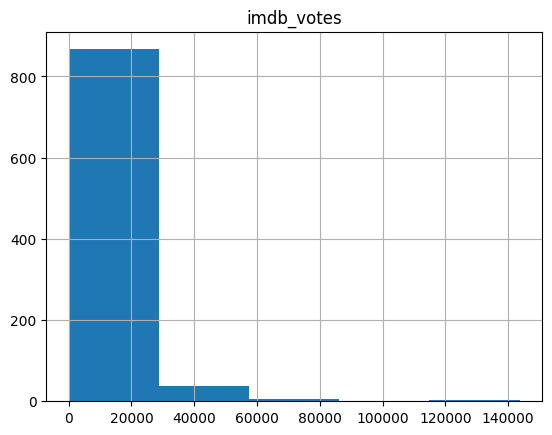

In [33]:
xvotes = pd.cut(meta_ratings["imdb_votes"], 5)
meta_ratings.hist("imdb_votes", bins = 5)
pd.value_counts(xvotes);

### Most of the rating are in the range from 3.76 to 7.52.
### 99 movies for higher rating - 7.5 to 9.4
### 13 movies for lowest rating - -0.0094, 1.88

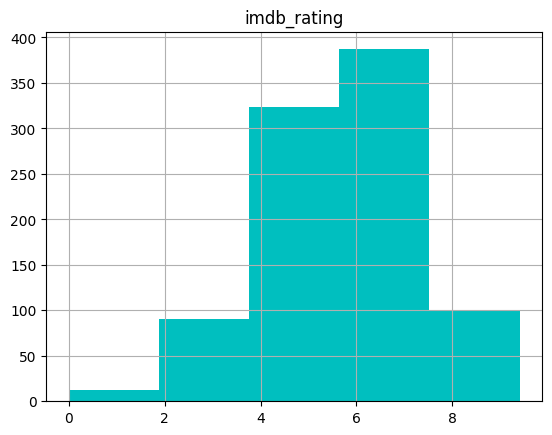

In [34]:
xratings = pd.cut(meta_ratings["imdb_rating"], 5)
meta_ratings.hist("imdb_rating", bins = 5,color ='c')
pd.value_counts(xratings);

### there is relation between votes and ratings
### as per line votes increases voting also increase

In [ ]:
plt.figure()
sns.regplot(meta_ratings.imdb_votes,meta_ratings.imdb_rating);

sns.jointplot("imdb_votes","imdb_rating", data = meta_ratings);


### Now answering some question

### Across the year which top-5 movie that got the highest rating ?

# Family of Thakurganj got highest rating


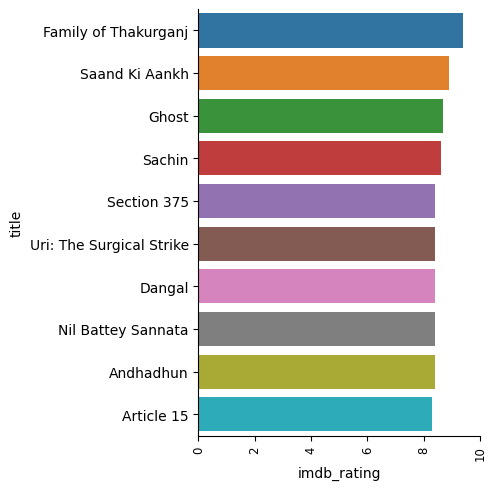

In [36]:
meta_ratings.sort_values(by = 'imdb_rating',ascending=False)

top5rating = meta_ratings.sort_values(by="imdb_rating", ascending = False)[:10]
snstop5ratngPlot = sns.catplot(y= "title", x="imdb_rating", data = top5rating, kind = "bar")
snstop5ratngPlot.set_xticklabels(rotation = 90, fontsize = "small");

### Across the year which top-10 movie that got the highest votes and so were more popular ?

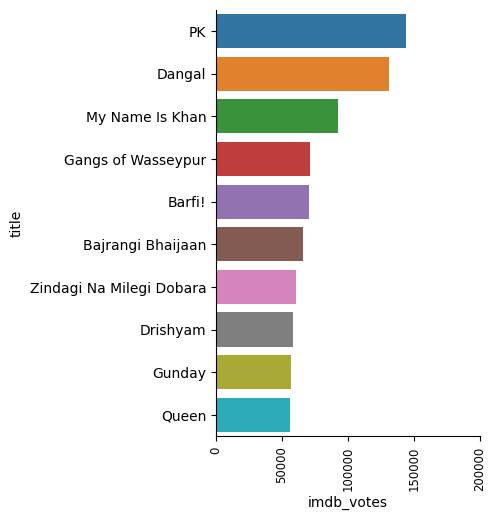

In [37]:
meta_ratings.sort_values(by = 'imdb_votes',ascending = False)

top5voting = meta_ratings.sort_values(by="imdb_votes", ascending = False)[:10]
snstop5votingPlot = sns.catplot(y= "title", x="imdb_votes", data = top5voting, kind = "bar")
snstop5votingPlot.set_xticklabels(rotation = 90, fontsize = "small");

### Yearwise which top-5 movie that got the highest voting ?

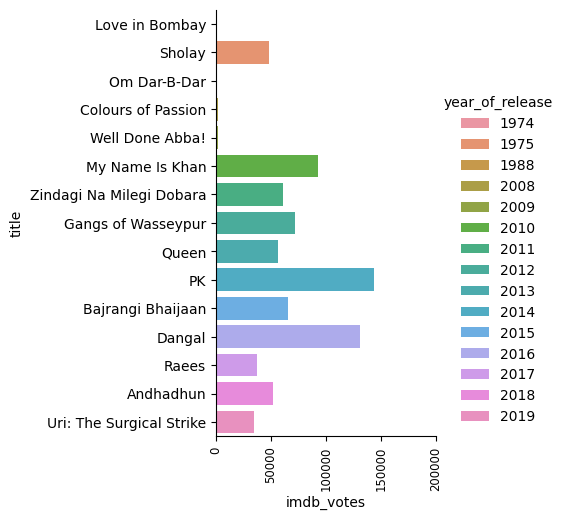

In [38]:
def sortYearWise(df, colNames):
    return df.sort_values(by=colNames, ascending = False)[:1]

yearWisetop5votes = meta_ratings.groupby("year_of_release").apply(sortYearWise, "imdb_votes")
yearWisetop5votes

yearWisevotesPlot1 = sns.catplot(y="title", x = "imdb_votes", kind ="bar", hue="year_of_release", 
                                 data = yearWisetop5votes, dodge=False)
yearWisevotesPlot1.set_xticklabels(rotation = 90, fontsize = "small");